Importing the Libraries for Data-Description

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Read the data from 'dataset.csv' file and create a dataframe

In [2]:
df = pd.read_csv('dataset.csv')
df.shape

(1172, 12)

In [3]:
df.head()

,frequency_of_a_tags,frequency_of_alltags,presence_of_iframes,presence_of_popups,right_click_disabling,num_of_redirects,checking_cookies,checking_sfh,request_url,url-of-anchor,links_in_meta_img,Result
0,-1,-1,1,1,1,0,1,-1,-1,-1,-1,1
1,1,1,1,1,1,NaN,1,-1,1,-1,1,1
2,1,1,1,1,1,0,1,-1,1,-1,1,1
3,1,1,1,1,1,NaN,-1,-1,-1,0,1,1
4,1,-1,1,1,1,NaN,1,-1,-1,-1,1,1


In [4]:
df.columns

Index(['frequency_of_a_tags', 'frequency_of_alltags', 'presence_of_iframes',
       'presence_of_popups', 'right_click_disabling', 'num_of_redirects',
       'checking_cookies', 'checking_sfh', 'request_url', 'url-of-anchor',
       'links_in_meta_img', 'Result'],
      dtype='object')

As the column names have leading white spaces, we will rename the columns

As we had merged two csv files to create a dataset, we need to check the unique values present in each column

In [5]:
# Investigate unique values in the each column
unique_frequency_a = df['frequency_of_a_tags'].unique()
unique_all = df['frequency_of_alltags'].unique()
unique_iframes = df['presence_of_iframes'].unique()
unique_popups = df['presence_of_popups'].unique()
unique_rightclick = df['right_click_disabling'].unique()
unique_redirects = df['num_of_redirects'].unique()
unique_cookies = df['checking_cookies'].unique()
unique_sfh = df['checking_sfh'].unique()
unique_request = df['request_url'].unique()
unique_url = df['url-of-anchor'].unique()
unique_meta = df['links_in_meta_img'].unique()
unique_R = df['Result'].unique()

print(unique_frequency_a)
print(unique_all)
print(unique_iframes)
print(unique_popups)
print(unique_rightclick)
print(unique_redirects)
print(unique_cookies)
print(unique_sfh)
print(unique_request)
print(unique_url)
print(unique_meta)
print(unique_R)

['-1' '1' nan 'frequency_of_a_tags']
['-1' '1' nan 'frequency_of_alltags']
['1' 'presence_of_iframes']
['1' nan '-1' 'presence_of_popups']
['1' 'right_click_disabling' '-1']
['0' nan '1' '-1' '-99' 'num_of_redirects']
['1' '-1' '-99' 'checking_cookies']
['-1' '1' '0' 'checking_sfh']
['-1' '1' '0' 'request_url']
['-1' '0' '1' 'url-of-anchor']
['-1' '1' '0' 'links_in_meta_img']
['1' 'Result' '-1']


As there are white-space along with 1, 0, and -1 we need to remove rest of the things, and then convert the values to int 

In [6]:
validValues = {-1, 0, 1}

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df[df[column].isin(validValues)]

# Convert all columns to integers (again after the filtering)
df = df.astype(int)

In [7]:
# Now you can use the DataFrame with valid integer values (1, -1, and 0)
print(df)

      frequency_of_a_tags  frequency_of_alltags  presence_of_iframes  \
0                      -1                    -1                    1   
2                       1                     1                    1   
7                      -1                    -1                    1   
12                      1                     1                    1   
13                      1                     1                    1   
...                   ...                   ...                  ...   
954                    -1                    -1                    1   
1026                   -1                    -1                    1   
1044                    1                    -1                    1   
1104                   -1                    -1                    1   
1117                    1                     1                    1   

      presence_of_popups  right_click_disabling  num_of_redirects  \
0                      1                      1                 0 

Again check for the unique values present in each column

In [8]:
# Investigate unique values in the each column
unique_frequency_a = df['frequency_of_a_tags'].unique()
unique_all = df['frequency_of_alltags'].unique()
unique_iframes = df['presence_of_iframes'].unique()
unique_popups = df['presence_of_popups'].unique()
unique_rightclick = df['right_click_disabling'].unique()
unique_redirects = df['num_of_redirects'].unique()
unique_cookies = df['checking_cookies'].unique()
unique_sfh = df['checking_sfh'].unique()
unique_request = df['request_url'].unique()
unique_url = df['url-of-anchor'].unique()
unique_meta = df['links_in_meta_img'].unique()
unique_R = df['Result'].unique()

print(unique_frequency_a)
print(unique_all)
print(unique_iframes)
print(unique_popups)
print(unique_rightclick)
print(unique_redirects)
print(unique_cookies)
print(unique_sfh)
print(unique_request)
print(unique_url)
print(unique_meta)
print(unique_R)

[-1  1]
[-1  1]
[1]
[1]
[1]
[ 0  1 -1]
[ 1 -1]
[-1]
[-1  1  0]
[-1  0  1]
[-1  1  0]
[ 1 -1]


In [9]:
df.shape

(88, 12)

In [10]:
print("number of 1",len(df[df["Result"]==1]))
print("number of -1",len(df[df["Result"]==-1]))

number of 1 82
number of -1 6


##### Cleaning Data for NULL and duplicates 

In [12]:
data_no_duplicates = df.drop_duplicates()
data_cleaned = data_no_duplicates.dropna()

We now find the correlation between the columns values

In [13]:
corr=data_cleaned.corr()
corr

,frequency_of_a_tags,frequency_of_alltags,presence_of_iframes,presence_of_popups,right_click_disabling,num_of_redirects,checking_cookies,checking_sfh,request_url,url-of-anchor,links_in_meta_img,Result
frequency_of_a_tags,1.000000,0.505139,NaN,NaN,NaN,0.227901,-0.082503,NaN,0.166470,0.206368,0.148149,-0.009629
frequency_of_alltags,0.505139,1.000000,NaN,NaN,NaN,0.219716,-0.137491,NaN,0.264367,0.007883,0.429166,0.079002
presence_of_iframes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presence_of_popups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
right_click_disabling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_of_redirects,0.227901,0.219716,NaN,NaN,NaN,1.000000,-0.072619,NaN,0.032428,0.188153,0.060197,-0.060020
checking_cookies,-0.082503,-0.137491,NaN,NaN,NaN,-0.072619,1.000000,NaN,-0.116741,-0.013925,-0.172518,0.099033
checking_sfh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
request_url,0.166470,0.264367,NaN,NaN,NaN,0.032428,-0.116741,NaN,1.000000,0.352219,0.092598,0.245238
url-of-anchor,0.206368,0.007883,NaN,NaN,NaN,0.188153,-0.013925,NaN,0.352219,1.000000,-0.186386,0.078354


<Axes: >

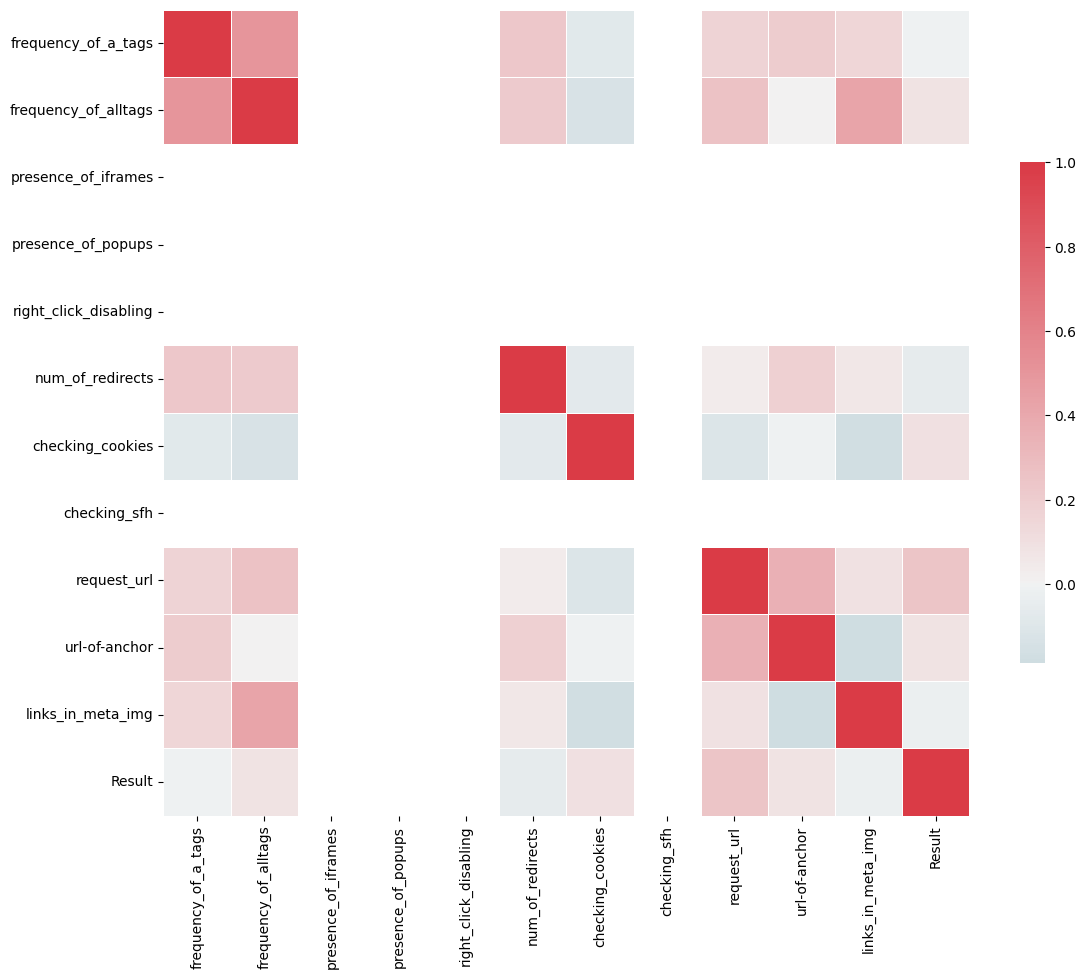

In [14]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})